In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# adjust 한글 font
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
# plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# [$\gamma$] handwrite classify
- 제공 데이터 :
    - 숫자 필기체 이미지를 텍스트 형태로 변환한 데이터
    - 0과 1로 구성되있음
- 머신러닝 알고리즘 2종 이상 사용하고 각 알고리즘의 결과를 출력해야 함
- 각 알고리즘은 아래와 같이 동일하게 3가지가 출력되어야 함
    - 분류기가 예측한 숫자와 실제 숫자가 맞는지 출력(테스트 데이터 수만큼)
    - 에러 카운트
    - 에러 비율
- 학습과 테스트 가급적 라이브러리 사용 자제

## file read

In [2]:
# file이 저장되어 있는 path 저장
train_data_path = 'C:/workspace/KSA/perform_eval/data/1st/trainingDigits/'
test_data_path = 'C:/workspace/KSA/perform_eval/data/1st/testDigits/'

In [163]:
f = open(train_data_path + '0_0.txt')
np.array([list(line.split('\n')[0]) for line in f.readlines()], dtype=np.int).shape

(32, 32)

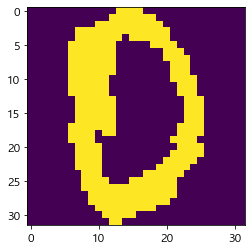

In [3]:
# sample image 출력
f = open(train_data_path + '0_0.txt')
plt.imshow(np.array([list(line.split('\n')[0]) for line in f.readlines()], dtype=np.int))

In [4]:
from os import listdir

def read_digit_txt(file_path, file_name):
    f = open(file_path + file_name)
    data = [list(line.split('\n')[0]) for line in f.readlines()]
    label = file_name.split('_')[0]
    return data, label

def load_data(file_path):
    digits = {}
    listdir_ = listdir(file_path)
    data_store = np.zeros((len(listdir_), 32, 32))
    label_store = np.zeros((len(listdir_)))
    for ix, file in enumerate(listdir_):
        data_store[ix], label_store[ix] = read_digit_txt(file_path, file)
    digits['data'] = data_store.astype(int)
    digits['label'] = label_store.astype(int)
    return digits

In [5]:
# read train data
train_digits = load_data(train_data_path)
# read test data
test_digits = load_data(test_data_path)

In [6]:
train_digits

{'data': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0

In [7]:
test_digits

{'data': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0

In [8]:
train_digits['data'].shape, train_digits['label'].shape

((1934, 32, 32), (1934,))

In [9]:
test_digits['data'].shape, test_digits['label'].shape

((946, 32, 32), (946,))

## Train, Test 구성

In [10]:
X_train, y_train  = train_digits['data'], train_digits['label']
X_test, y_test = test_digits['data'], test_digits['label']

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1934, 32, 32), (1934,), (946, 32, 32), (946,))

In [12]:
# 32*32 이미지 flatten
X_train = X_train.reshape(1934, -1)
X_test = X_test.reshape(946, -1)

In [13]:
X_train.shape, X_test.shape

((1934, 1024), (946, 1024))

In [14]:
# label이 0,0,0,0,....,1,1,1,1,1.....,9,9,9,9,9와 같은 식으로 되어있음
y_train

array([0, 0, 0, ..., 9, 9, 9])

In [15]:
# shuffle index
shuffle_index = np.random.permutation(1934)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [16]:
y_train

array([9, 3, 1, ..., 7, 6, 9])

## 결과 출력 함수 준비

In [417]:
def print_test_result(y_pred, y_true):
    for pred, true in zip(y_pred, y_true):
        print('the classifier came back with : {}, the real answer is : {}'.format(pred, true))
    total_error = sum(y_pred != y_true)
    total_err_rate = total_error / len(y_true)
    print('the total number of errors is : {}'.format(total_error))
    print('the total error rate is : {:.6f}'.format(total_err_rate))

# Start Training!

## KNN Classifier

>### BaseLine
- 수업시간에 구현한 알고리즘으로 학습
- 간단한 함수 수정을 통해 test dataset predict

In [89]:
# KNN 구현 함수 load
import operator

# Euclidean distance를 계산하여 k 이웃 voting으로 label 분류
def classify0(inX, data, labels, k):
    data_size = data.shape[0]
    diffmat = np.tile(inX, (data_size, 1)) - data
    sq_diffmat = diffmat ** 2
    sq_distance = sq_diffmat.sum(axis=1)
    distance = sq_distance ** .5
    sorted_dist_indicies = distance.argsort()
    class_count = {}
    for i in range(k):
        votellabel = labels[sorted_dist_indicies[i]]
        class_count[votellabel] = class_count.get(votellabel, 0) + 1
    sorted_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_class_count[0][0]

# digits 데이터는 이미 0과 1로 구성되있음
# MinMaxScaler는 사용할 필요 X
# def auto_norm(df):
#     min_val = df.min(0)
#     max_val = df.max(0)
#     ranges = max_val - min_val
#     norm_df = np.zeros(np.shape(df))
#     m = df.shape[0]
#     norm_df = df - np.tile(min_val, (m, 1))
#     norm_df = norm_df / np.tile(ranges, (m, 1))
#     return norm_df, ranges, min_val

# 기존의 class test 함수
# def dating_class_test(train, train_label, hold_out_ratio=.1):
#     norm_df, ranges, min_val = auto_norm(train)
#     m = norm_df.shape[0]
#     num_test = int(m * hold_out_ratio)
#     error_count = .0
#     for i in range(num_test):
#         res = classify0(norm_df[i, :], norm_df[num_test:m, :], train_label[num_test:m], 3)
#         print('classifier came back with : {}, the real answer is : {}'.format(res, train_label[i]))
#         if res != train_label[i]:
#             error_count += 1.
#     print('ToT Error rate is : {}'.format(error_count / float(num_test)))
#     print('Error Count : {}'.format(error_count))
    
def digit_class_test(train, train_label, hold_out_ratio=.1, k=3):
    norm_df, ranges, min_val = train, 1, 0
    m = norm_df.shape[0]
    num_test = int(m * hold_out_ratio)
    error_count = .0
    for i in range(num_test):
        res = classify0(norm_df[i, :], norm_df[num_test:m, :], train_label[num_test:m], k)
#         print('the classifier came back with:{}, the real answer is:{}'.format(res, train_label[i]))
        if res != train_label[i]:
            error_count += 1.
    print('the total number of errors rate is: {}'.format(error_count))
    print('the total error rate is: {}'.format(error_count / float(num_test)))

In [90]:
np.all(X_train == (X_train - np.tile(0, (X_train.shape[0], 1))) / np.tile(1, (X_train.shape[0], 1)))
# auto norm 함수는 필요 x
# class test함수 간단한 수정

True

- 흔히 `k`를 train data의 수가 `n`일 때 ${n\over{3}}$이나 $\sqrt{n}$을 사용

In [91]:
k1 = int(X_train.shape[0] / 3)
k2 = int(np.sqrt(X_train.shape[0]))
print(k1, k2)

644 43


In [92]:
print('true label은 :', y_train[0], '\n')
for k in range(3, 50):
    pred = classify0(np.array(X_train[0]), X_train, y_train, k)
    print('k = {:02}'.format(k), ' 모델이 분류한 label :', pred, pred == y_train[0])

# 첫번째 라벨은 k=23 이후부턴 쭉 잘못된 예측을 진행하고 있다.

true label은 : 9 

k = 03  모델이 분류한 label : 9 True
k = 04  모델이 분류한 label : 9 True
k = 05  모델이 분류한 label : 9 True
k = 06  모델이 분류한 label : 9 True
k = 07  모델이 분류한 label : 3 False
k = 08  모델이 분류한 label : 3 False
k = 09  모델이 분류한 label : 3 False
k = 10  모델이 분류한 label : 9 True
k = 11  모델이 분류한 label : 9 True
k = 12  모델이 분류한 label : 9 True
k = 13  모델이 분류한 label : 3 False
k = 14  모델이 분류한 label : 9 True
k = 15  모델이 분류한 label : 3 False
k = 16  모델이 분류한 label : 9 True
k = 17  모델이 분류한 label : 3 False
k = 18  모델이 분류한 label : 9 True
k = 19  모델이 분류한 label : 9 True
k = 20  모델이 분류한 label : 9 True
k = 21  모델이 분류한 label : 9 True
k = 22  모델이 분류한 label : 9 True
k = 23  모델이 분류한 label : 9 True
k = 24  모델이 분류한 label : 3 False
k = 25  모델이 분류한 label : 3 False
k = 26  모델이 분류한 label : 3 False
k = 27  모델이 분류한 label : 3 False
k = 28  모델이 분류한 label : 3 False
k = 29  모델이 분류한 label : 3 False
k = 30  모델이 분류한 label : 3 False
k = 31  모델이 분류한 label : 3 False
k = 32  모델이 분류한 label : 3 False
k = 33  모델이 분류한 label : 3 False
k = 3

In [93]:
# holdout = .5
# k = len(train) / 3
# 제대로 학습한 것인지 판단을 위해서는
# fit, predict함수를 만들어서 예측을 할 필요가 있어보임
digit_class_test(X_train, y_train, .5, k=k1)

the total number of errors rate is: 534.0
the total error rate is: 0.5522233712512926


In [94]:
# holdout = .5
# k = sqrt(len(train))
digit_class_test(X_train, y_train, .5, k=k2)

the total number of errors rate is: 77.0
the total error rate is: 0.0796277145811789


In [95]:
# holdout = .5
# k = 23
digit_class_test(X_train, y_train, .5, k=23)

the total number of errors rate is: 61.0
the total error rate is: 0.06308169596690796


In [96]:
# train으로만 학습
# k = 13
digit_class_test(X_train, y_train, .5, k=13)

the total number of errors rate is: 48.0
the total error rate is: 0.04963805584281282


>### Revise Distance function and Implement CV, Hyperparameter k
- 3가지의 Distance Measure 구현
    - Euclidean
    - Taxicab
    - Maximum
    - ~~Discrete~~
    - 이를 바탕으로 KNNClassifier class 만들기
- Cross Validation을 활용한 Overfitting 방지
- grid search를 간단하게 구현하여 최적의 K 찾기

>>#### First, 
- KNN class 구현
    - Distance measure 구현
    - scikit-learn과 같이 fit, predict 구현
    - 추상화 클래스 적용은 아직 개념을 못해서 scikit-learn과의 교류는 과제로 남아있음
        - `from sklearn.base import BaseEstimator`의 의미 파악하기

In [412]:
# KNN 분류기 객체
from sklearn.base import BaseEstimator

class KNNClassifier(BaseEstimator):
    
    def __init__(self, k, measure='euclidean'):
        """
        ----------------------------   DESCRIPTION   ----------------------------------
        
        수업 시간에 구현한 KNN 분류기에 measure 값과 predict 함수를 추가하여 만든 class
        ----------------------------   PARAMETER     ----------------------------------
        
        k : K - Nearest Neighborhood의 k. 인근 몇 개의 점을 볼 것인지 판단
        measure : 데이터 포인트들간의 거리를 측정할 때, 어떤 거리 측도를 사용할 지 판단.
                  default = 'euclidean',
                  'taxicab'과 'maximum' measure를 사용할 수 있다.
                  참고 : https://proofwiki.org/wiki/Definition:General_Euclidean_Metric
        -------------------------------------------------------------------------------
        """
        self.k = k
        self.measure = measure
    
    def fit(self, X_train, y_train):
        """
        ----------------------------   DESCRIPTION   ----------------------------------
        
        Train dataset을 적합시키는 함수
        ----------------------------   PARAMETER     ----------------------------------
        
        X_train : np.array n-D, train data
        y_train : np.array 1-D, train label
        -------------------------------------------------------------------------------
        """
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        """
        ----------------------------   DESCRIPTION   ----------------------------------
        
        테스트 데이터가 입력되었을 시, classify0 메서드로 적합된 훈련 데이터 세트를 활용
        하여 결과값을 반환한다.
        ----------------------------   PARAMETER     ----------------------------------
        
        X_test : np.array n-D, test data
                 fit 메서드에 적합된 self.X_train과 동일한 차원의 데이터를 
                 입력해야한다.
        -------------------------------------------------------------------------------
        """
        res = np.zeros(X_test.shape[0])
        for i, inX in enumerate(X_test):
            res[i] = self.classify0(inX, self.X_train, self.y_train)
        return res
    
    def classify0(self, inX, data, labels):
        """
        -------------------------------DESCRIPTION-------------------------------------
        
        한 데이터 포인트와 학습한 데이터 포인트들간의 거리를 측정하여 k개의 점을
        참고, 입력 데이터 포인트를 분류하는 함수
        ----------------------------   PARAMETER     ----------------------------------
        
        inX : data point, data의 모든 데이터 포인트의 길이와 같아야 한다.
        data : np.array, n-D
               입력된 데이터 포인트와 거리를 비교할 데이터 세트
        labels : np.array, 1-D
                 입력된 데이터 포인트가 어느 그룹에 속하는지 참고할 라벨
                 data와 1-1 corresponding이 되어야 한다.
        -------------------------------------------------------------------------------
        """
        # 세 가지 distance measure 중 하나를 계산
        if self.measure.lower() == 'taxicab':
            distance = self.taxicab(inX, data)
        elif self.measure.lower() == 'maximum':
            distance = self.maximum(inX, data)
        else: # get euclidean distance
            distance = self.euclidean(inX, data)
        # distance를 작은 값부터 정렬(index 반환)
        sorted_dist_indicies = distance.argsort()
        class_count = {}
        # k개의 train data point 참고
        for i in range(self.k):
            votellabel = labels[sorted_dist_indicies[i]]
            class_count[votellabel] = class_count.get(votellabel, 0) + 1
        sorted_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse=True)
        return sorted_class_count[0][0]
    
    def euclidean(self, pt, data):
        """
        -------------------------------DESCRIPTION-------------------------------------
        
        Euclidean Distance를 구하는 함수
        ----------------------------   PARAMETER     ----------------------------------
        
        pt : data point, data의 모든 데이터 포인트의 길이와 같아야 한다.
        data : np.array, n-D
               입력된 데이터 포인트와 거리를 비교할 데이터 세트
        -------------------------------------------------------------------------------
        """
        distance = ((pt - data) ** 2).sum(axis=1) ** .5
        return distance
    
    def taxicab(self, pt, data):
        """
        -------------------------------DESCRIPTION-------------------------------------
        
        Taxicab Distance를 구하는 함수
        ----------------------------   PARAMETER     ----------------------------------
        
        pt : data point, data의 모든 데이터 포인트의 길이와 같아야 한다.
        data : np.array, n-D
               입력된 데이터 포인트와 거리를 비교할 데이터 세트
        -------------------------------------------------------------------------------
        """
        distance = np.abs(pt - data).sum(axis=1)
        return distance
    
    def maximum(self, pt, data):
        """
        -------------------------------DESCRIPTION-------------------------------------
        
        Maximum Distance를 구하는 함수
        ----------------------------   PARAMETER     ----------------------------------
        
        pt : data point, data의 모든 데이터 포인트의 길이와 같아야 한다.
        data : np.array, n-D
               입력된 데이터 포인트와 거리를 비교할 데이터 세트
        -------------------------------------------------------------------------------
        """
        distance = np.abs(pt -data).max(axis=1)
        return distance

- 잘 작동하는지 test

In [379]:
((X_test[0] - X_train) ** 2).sum(axis=1)

array([225, 315, 281, ..., 368, 313, 327], dtype=int32)

In [369]:
((X_test[0] - X_train) ** 2).sum(axis=1) ** .5

array([15.        , 17.74823935, 16.76305461, ..., 19.18332609,
       17.69180601, 18.08314132])

In [370]:
sorted_dist_indicies = (((X_test[0] - X_train) ** 2).sum(1) ** .5).argsort()
sorted_dist_indicies

array([  21, 1323,  711, ...,  359, 1288,  101], dtype=int64)

In [371]:
class_count = {}

In [372]:
i = 6
votellabel = y_train[sorted_dist_indicies[i]]
class_count[votellabel] = class_count.get(votellabel, 0) + 1
votellabel # y_train[21]

0

In [373]:
sorted_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse=True)
sorted_class_count

[(0, 1)]

In [374]:
sorted_class_count[0][0]

0

In [375]:
y_train[:10]

array([9, 3, 1, 1, 6, 7, 2, 6, 3, 5])

- class 직접 test

In [415]:
knn_clf = KNNClassifier(k=5, measure='euclidean')
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_train) # Train data 셋으로 학습 확인

In [418]:
# Train dataset으로 predict
# 0.983454의 정확도가 나왔다.
# 올바르게 분류한 것인지 교차 검증이 필요하다.
print_test_result(y_pred.astype(int), y_train)

the classifier came back with : 9, the real answer is : 9
the classifier came back with : 3, the real answer is : 3
the classifier came back with : 1, the real answer is : 1
the classifier came back with : 1, the real answer is : 1
the classifier came back with : 6, the real answer is : 6
the classifier came back with : 7, the real answer is : 7
the classifier came back with : 2, the real answer is : 2
the classifier came back with : 6, the real answer is : 6
the classifier came back with : 3, the real answer is : 3
the classifier came back with : 5, the real answer is : 5
the classifier came back with : 3, the real answer is : 3
the classifier came back with : 9, the real answer is : 9
the classifier came back with : 0, the real answer is : 0
the classifier came back with : 8, the real answer is : 8
the classifier came back with : 7, the real answer is : 7
the classifier came back with : 1, the real answer is : 1
the classifier came back with : 7, the real answer is : 7
the classifier

>>#### Second, 
- Cross Validation 구현

In [406]:
def data_stratifiedkfold(data, label, n_splits):
    """
    shuffle은 구현 X ->> 위에서 데이터셋의 index를 미리 섞어놓음
    """
    n_size = data.shape[0]
    ind = int(n_size / n_splits)
    fold_data, fold_label = [], []
    # n_splits의 수만큼 교차 검증할 데이터셋 생성
    for i in range(n_splits):
        # n_size - ind * n_splits의 값들을 얻기위해 조건을 나눔
        if i + 1 == n_splits:
            fold_data.append(data[i * ind :])
            fold_label.append(label[i * ind :])
        else:
            fold_data.append(data[i * ind : (i + 1) * ind])
            fold_label.append(label[i * ind : (i + 1) * ind])
    return fold_data, fold_label

def cross_val_score(model, data, label, n_splits, scoring='accuracy'):
    # 교차검증에 사용할 계층적 k fold 데이터셋 load
    fold_data, fold_label = data_stratifiedkfold(data, label, n_splits)
    res = [] # CV 결과를 저장
    for i in range(n_splits):
        # i == 0, i == n_splits-1인 경우에 없는 list에 접근하여 오류 발생
        # np.concatenate 함수는 적어도 한 개의 원소를 가져야 붙임
        # 이를 방지하고자 조건을 나눠서 데이터 셋을 할당
        if i == 0:
            X_train_df = np.concatenate(fold_data[i+1:])
            y_train_df = np.concatenate(fold_label[i+1:])
        elif i + 1 == n_splits:
            X_train_df = np.concatenate(fold_data[:i])
            y_train_df = np.concatenate(fold_label[:i])
        else:
            X_train_df = np.concatenate(
                (np.concatenate(fold_data[:i]), 
                 np.concatenate(fold_data[i+1:])))
            y_train_df = np.concatenate(
                (np.concatenate(fold_label[:i]), 
                 np.concatenate(fold_label[i+1:])))
        X_valid_df = fold_data[i]
        y_valid_df = fold_label[i] # 교차 검증을 위해 데이터 셋 분할 완료
                                   # n_splits = 3이었으면
                                   # [ 1, 2 ] : [ 3 ]
                                   # [ 1 ] : [ 2, 3 ]
                                   # [ 1, 3 ] : [ 2 ]
                                   # 위와 같이 3 가지 경우로 교차 검증 실시
                                   # ':' 기준으로 왼쪽이 train, 오른쪽이 valid
        model.fit(X_train_df, y_train_df)
        cv_pred = model.predict(X_valid_df)
        # calc accuracy
        acc_score = sum(cv_pred == y_valid_df) / len(cv_pred)
        res.append(acc_score)
    return res

In [420]:
knn_clf = KNNClassifier(k=5, measure='euclidean')
res = cross_val_score(knn_clf, X_train, y_train, n_splits=5)
print('교차 검증 결과 :', res)
np.mean(res) # 교차검증에서의 정확도
             # train의 0.983454와 비교해서 평균성능이 1% 가량 떨어졌다.
             # 크게 하락하지 않고 잘 나온 결과

교차 검증 결과 : [0.9715025906735751, 0.9715025906735751, 0.9689119170984456, 0.9844559585492227, 0.9717948717948718]


0.973633585757938

>>#### Third, 
- Grid Search 구현 $\rightarrow$ 함수로 구현 X, 개념적으로만 구현
- 구현한 KNN에 존재하는 Hyper-Parameter는 두 가지
    - k
    - measure

[[  0   1   2   3   4   5   6   7   8   9]
 [189 198 195 199 186 187 195 201 180 204]]


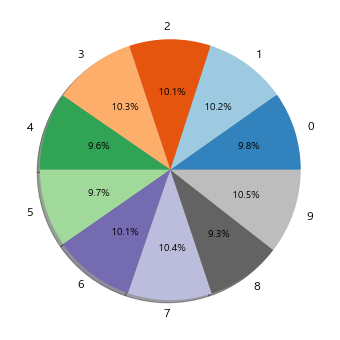

In [436]:
label_name, label_num = np.unique(y_train, return_counts=True)
print(np.array([label_name, label_num]))
plt.figure(figsize=(9, 6))
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(10)*2)
plt.pie(label_num,
       explode=[0]*10, labels=label_name,
       colors=outer_colors, autopct="%5.1f%%",
       shadow=True)
plt.show()

- 라벨은 고루고루 존재
- k의 max를 전체의 15%로 책정

In [450]:
# Grid Search 실시
from collections import defaultdict

ks = [k for k in range(3, int(.15 * X_train.shape[0]), 5)]
measures = ['euclidean', 'taxicab', 'maximum']
params_score = defaultdict(dict)
best_score = 0
for measure in measures:
    for k in ks:
        knn_clf = KNNClassifier(k=k, measure=measure)
        res = cross_val_score(knn_clf, X_train, y_train, n_splits=5)
        cvscore = np.mean(res)
        params_score[k][measure] = cvscore        
        if cvscore > best_score:
            best_score = cvscore
            is_best_params = '\tBest Params !!'
        print('Grid Search, k : {}, measure : {} =>>\tcvscore : {:.4f}{}'.format(
                k, measure, cvscore, is_best_params))
        is_best_params = ''

Grid Search, k : 3, measure : euclidean =>>	cvscore : 0.9752	Best Params !!
Grid Search, k : 8, measure : euclidean =>>	cvscore : 0.9674
Grid Search, k : 13, measure : euclidean =>>	cvscore : 0.9664
Grid Search, k : 18, measure : euclidean =>>	cvscore : 0.9597
Grid Search, k : 23, measure : euclidean =>>	cvscore : 0.9524
Grid Search, k : 28, measure : euclidean =>>	cvscore : 0.9504
Grid Search, k : 33, measure : euclidean =>>	cvscore : 0.9452
Grid Search, k : 38, measure : euclidean =>>	cvscore : 0.9416
Grid Search, k : 43, measure : euclidean =>>	cvscore : 0.9369
Grid Search, k : 48, measure : euclidean =>>	cvscore : 0.9354
Grid Search, k : 53, measure : euclidean =>>	cvscore : 0.9343
Grid Search, k : 58, measure : euclidean =>>	cvscore : 0.9312
Grid Search, k : 63, measure : euclidean =>>	cvscore : 0.9312
Grid Search, k : 68, measure : euclidean =>>	cvscore : 0.9276
Grid Search, k : 73, measure : euclidean =>>	cvscore : 0.9297
Grid Search, k : 78, measure : euclidean =>>	cvscore : 0.

Grid Search, k : 93, measure : maximum =>>	cvscore : 0.0957
Grid Search, k : 98, measure : maximum =>>	cvscore : 0.0946
Grid Search, k : 103, measure : maximum =>>	cvscore : 0.0957
Grid Search, k : 108, measure : maximum =>>	cvscore : 0.0957
Grid Search, k : 113, measure : maximum =>>	cvscore : 0.0957
Grid Search, k : 118, measure : maximum =>>	cvscore : 0.0946
Grid Search, k : 123, measure : maximum =>>	cvscore : 0.0946
Grid Search, k : 128, measure : maximum =>>	cvscore : 0.0957
Grid Search, k : 133, measure : maximum =>>	cvscore : 0.0957
Grid Search, k : 138, measure : maximum =>>	cvscore : 0.0957
Grid Search, k : 143, measure : maximum =>>	cvscore : 0.0957
Grid Search, k : 148, measure : maximum =>>	cvscore : 0.0957
Grid Search, k : 153, measure : maximum =>>	cvscore : 0.0957
Grid Search, k : 158, measure : maximum =>>	cvscore : 0.0957
Grid Search, k : 163, measure : maximum =>>	cvscore : 0.0957
Grid Search, k : 168, measure : maximum =>>	cvscore : 0.0957
Grid Search, k : 173, meas

In [452]:
# Grid Search 실시
from collections import defaultdict

ks = [2, 3, 4, 5, 6, 7] # k = 3일 때 Best, 근처의 값들을 넣고 돌려보자!
measures = ['euclidean'] # taxicab은 euclidean과 결과가 동일
                         # maximum은 현재 결과가 현저히 저조 > 0, 1이기 떄문
params_score2 = defaultdict(dict)
best_score = 0
for measure in measures:
    for k in ks:
        knn_clf = KNNClassifier(k=k, measure=measure)
        res = cross_val_score(knn_clf, X_train, y_train, n_splits=5)
        cvscore = np.mean(res)
        params_score2[k][measure] = cvscore        
        if cvscore > best_score:
            best_score = cvscore
            is_best_params = '\tBest Params !!'
        print('Grid Search, k : {}, measure : {} =>>\tcvscore : {:.4f}{}'.format(
                k, measure, cvscore, is_best_params))
        is_best_params = ''

Grid Search, k : 2, measure : euclidean =>>	cvscore : 0.9752	Best Params !!
Grid Search, k : 3, measure : euclidean =>>	cvscore : 0.9752
Grid Search, k : 4, measure : euclidean =>>	cvscore : 0.9798	Best Params !!
Grid Search, k : 5, measure : euclidean =>>	cvscore : 0.9736
Grid Search, k : 6, measure : euclidean =>>	cvscore : 0.9726
Grid Search, k : 7, measure : euclidean =>>	cvscore : 0.9664


## RESULT - testset predict

In [457]:
knn_clf = KNNClassifier(k=4, measure='euclidean') # Best params
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test).astype(int)

In [458]:
print_test_result(y_pred, y_test) # 결과 : 11개 틀림
                                  # accuracy = 0.988372

the classifier came back with : 0, the real answer is : 0
the classifier came back with : 0, the real answer is : 0
the classifier came back with : 0, the real answer is : 0
the classifier came back with : 0, the real answer is : 0
the classifier came back with : 0, the real answer is : 0
the classifier came back with : 0, the real answer is : 0
the classifier came back with : 0, the real answer is : 0
the classifier came back with : 0, the real answer is : 0
the classifier came back with : 0, the real answer is : 0
the classifier came back with : 0, the real answer is : 0
the classifier came back with : 0, the real answer is : 0
the classifier came back with : 0, the real answer is : 0
the classifier came back with : 0, the real answer is : 0
the classifier came back with : 0, the real answer is : 0
the classifier came back with : 0, the real answer is : 0
the classifier came back with : 0, the real answer is : 0
the classifier came back with : 0, the real answer is : 0
the classifier

- 추가적으로 적용해야 할 것들
    - measure 추가 (pearson, cosine similarity, 민코스키 거리 등)
    - weight 적용 (exponential, distance weighted)

## SVC

In [18]:
from sklearn.svm import SVC

svc = SVC(gamma='auto')

In [19]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
print_test_result(svc.predict(X_test),y_test)

the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back wit

>### XGBoost

In [21]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()

In [23]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [24]:
print_test_result(xgb_clf.predict(X_test),y_test)

the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back with:0, the real answer is:0
the classifier came back wit